(1)	The project title and the team members<br/>
Prediction of house's price<br/>
Xiaoyang Wang xiw137@pitt.edu <br/>
Yang Yuan yay74@pitt.edu<br/>

(2)	The problem you have chosen <br/>
With some explanatory variables describing (almost) every aspect of residential homes to predict the final price of each house.<br/>

(3)	Why is the problem interesting to you?<br/>
Everyone wants to own a dream house so that the price of the house is very important for people who want to buy house. It’s a very interesting issue. We think this issue will help us to develop our skill of data analysis and it’s helpful for us about finding a job of data statics.<br/>

(4)	What kind of data will you use?<br/>
In this issue, we get some csv documents which contain some explanatory features of a house to help us to get the final result.<br/>

(5)	Where did you get this data from?<br/>
We searched some sorts of relevant problems and decided to use dataset from kaggle.<br/>

(6)	At least three (3) questions that you would like to answer through your data analysis. <br/>
1.	Which characteristics can impact the final price of house most.<br/>
2.	With given characteristics which buyers like, give them a rough price.<br/>
3.	We will use some algorithms and models like logistic regression, supported vector machine so we want to find which model is the most effective. <br/>

(7)	Preliminary data manipulation

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib as mpl
import matplotlib.pyplot as plt
#load data
house_price=read_csv('./train.csv')
#handle missing data by filling all the NA with 0
house_price=house_price.fillna(0)

y1=house_price.SalePrice
y2=house_price.SalePrice
y3=house_price.SalePrice
x1=house_price.iloc[:,1:2]
x2=house_price.iloc[:,3:4]
x3=house_price.iloc[:,4:5]
#statistical summary of data 
des=pd.DataFrame.describe(house_price)
des


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,...,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,...,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,...,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,...,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,2010.000000,755000.000000


<h4>Our dataset contains too many features so we just plot 3 numerical features.


Text(0,0.5,'Price')

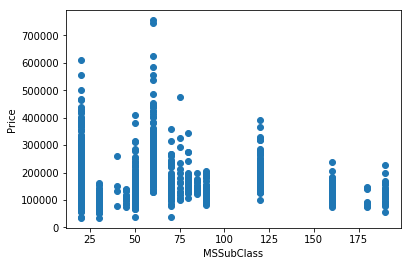

In [23]:
p1=plt.scatter(x1,y1);
plt.xlabel('MSSubClass')
plt.ylabel('Price')

Text(0,0.5,'Price')

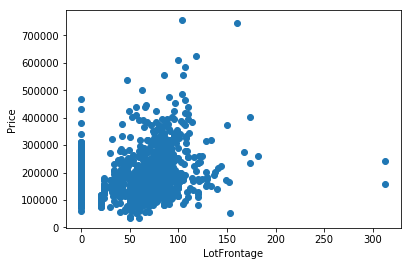

In [24]:
p2=plt.scatter(x2,y2);
plt.xlabel('LotFrontage')
plt.ylabel('Price')

Text(0,0.5,'Price')

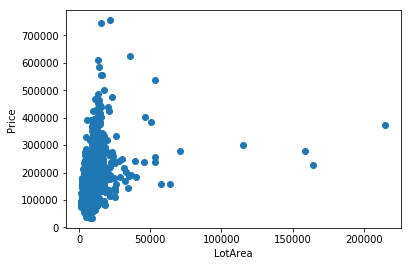

In [25]:
p3=plt.scatter(x3,y3);
plt.xlabel('LotArea')
plt.ylabel('Price')

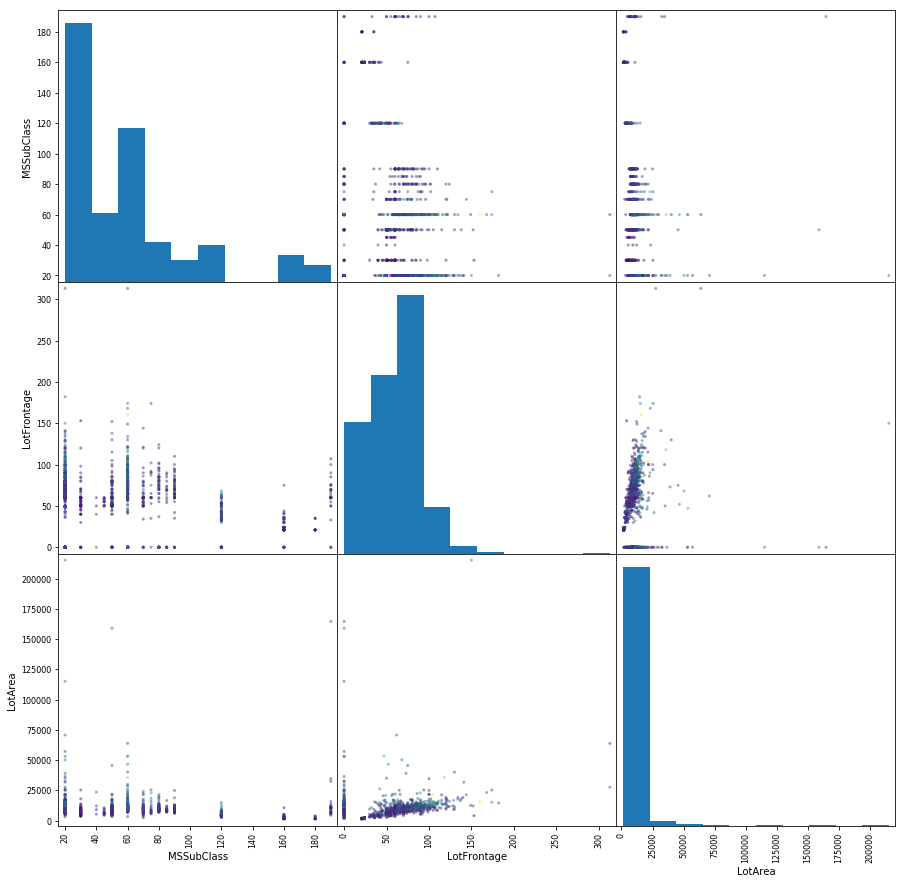

In [16]:
x=pd.concat([x1,x2,x3],axis=1)
#x=house_price.iloc[:,3:5]
iris_dataFrame=pd.DataFrame(x)
#create a scatter_matrix for the dataframe
sm=pd.plotting.scatter_matrix(iris_dataFrame,c=y1, figsize=(15,15))

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
#0,1 map
map={'CentralAir':{'Y':1,'N':0}}
house_price['CentralAir'] = house_price.replace(map)
#multiple encoding
PavedDrive=house_price['PavedDrive']
OHE=OneHotEncoder()
LbE = LabelEncoder()
PavedDrive=LbE.fit_transform(PavedDrive)
PavedDrive_enc = OHE.fit_transform(PavedDrive.reshape(-1,1)).toarray()
PavedDrive_enc = pd.DataFrame(PavedDrive_enc, columns=LbE.classes_)

In [16]:
#garage
#GarageType
GarageType=house_price['GarageType']
GarageType=LbE.fit_transform(GarageType.astype(str))
GarageType_enc = OHE.fit_transform(GarageType.reshape(-1,1)).toarray()
GarageType_enc = pd.DataFrame(GarageType_enc, columns=LbE.classes_)

In [18]:
#GarageFinish
GarageFinish=house_price['GarageFinish']
GarageFinish=LbE.fit_transform(GarageFinish.astype(str))
GarageFinish_enc = OHE.fit_transform(GarageFinish.reshape(-1,1)).toarray()
GarageFinish_enc = pd.DataFrame(GarageFinish_enc, columns=LbE.classes_)

In [19]:
#GarageQual
GarageQual=house_price['GarageQual']
GarageQual=LbE.fit_transform(GarageQual.astype(str))
GarageQual_enc = OHE.fit_transform(GarageQual.reshape(-1,1)).toarray()
GarageQual_enc = pd.DataFrame(GarageQual_enc, columns=LbE.classes_)

In [7]:
#GarageCond
GarageCond=house_price['GarageCond']
GarageCond=LbE.fit_transform(GarageCond.astype(str))
GarageCond_enc = OHE.fit_transform(GarageCond.reshape(-1,1)).toarray()
GarageCond_enc = pd.DataFrame(GarageCond_enc, columns=LbE.classes_)
GarageCond_enc

,0,Ex,Fa,Gd,Po,TA
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
#FireplaceQu
FireplaceQu= house_price['FireplaceQu']
FireplaceQu[FireplaceQu=='Po']='1'
FireplaceQu[FireplaceQu=='Fa']='2'
FireplaceQu[FireplaceQu=='TA']='3'
FireplaceQu[FireplaceQu=='Gd']='4'
FireplaceQu[FireplaceQu=='Ex']='5'
FireplaceQu_enc = LbE.fit_transform(FireplaceQu.astype(str))
FireplaceQu_enc=pd.DataFrame(FireplaceQu_enc,columns=['FireplaceQu'])

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\software\Anaconda\lib\site-packages

In [8]:
#Functional
Functional=house_price['Functional']
Functional=LbE.fit_transform(Functional.astype(str))
Functional_enc = OHE.fit_transform(Functional.reshape(-1,1)).toarray()
Functional_enc = pd.DataFrame(Functional_enc, columns=LbE.classes_)
Functional_enc

,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#KitchenQual
KitchenQual= house_price['KitchenQual']
KitchenQual[KitchenQual=='Po']='1'
KitchenQual[KitchenQual=='Fa']='2'
KitchenQual[KitchenQual=='TA']='3'
KitchenQual[KitchenQual=='Gd']='4'
KitchenQual[KitchenQual=='Ex']='5'
KitchenQual_enc = LbE.fit_transform(KitchenQual.astype(str))
KitchenQual_enc=pd.DataFrame(KitchenQual_enc,columns=['KitchenQual'])

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\software\Anaconda\lib\site-packages

In [35]:
house_price=pd.concat([house_price,KitchenQual],axis=1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,YrSold,SalePrice,KitchenQual,KitchenQual
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,2,548,TA,TA,Y,0,2008,208500,4,4
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,2,460,TA,TA,Y,298,2007,181500,3,3
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,2,608,TA,TA,Y,0,2008,223500,4,4
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,3,642,TA,TA,Y,0,2006,140000,4,4
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,3,836,TA,TA,Y,192,2008,250000,4,4
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,2,480,TA,TA,Y,40,2009,143000,3,3
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,2,636,TA,TA,Y,255,2007,307000,4,4
7,8,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,...,2,484,TA,TA,Y,235,2009,200000,3,3
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,2,468,Fa,TA,Y,90,2008,129900,3,3
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,1,205,Gd,TA,Y,0,2008,118000,3,3
